In [1]:
'''
This notebook implements a batch run for OFAT analysis
Packages
'''
from model import *
import csv
from mesa.batchrunner import BatchRunner
import pandas as pd
import numpy as np
import tqdm as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import time
from SALib.sample import saltelli
from SALib.analyze import sobol
from itertools import combinations
from joblib import Parallel, delayed, cpu_count

### Experiment: Income Policy

In [2]:
'''
Experiment: Income policy
'''
n = 30

with_income_policy = []
for i in range(n):

    model_s = HousingMarket(income_policy = True)
    model_s.run_model(1000)
    data = model_s.datacollector.get_model_vars_dataframe()
    with_income_policy.append(data['Gini'].iloc[-1])
    
without_income_policy = []
for i in range(n):

    model = HousingMarket()
    model.run_model(1000)
    data = model.datacollector.get_model_vars_dataframe()
    without_income_policy.append(data['Gini'].iloc[-1])

In [3]:
print(with_income_policy)
print(without_income_policy)

[0.6966401860784301, 0.726872269294274, 0.6827612567202622, 0.6906683030214756, 0.7387201295968527, 0.7076230158227259, 0.7192121206203029, 0.6851340374666588, 0.7293290234783983, 0.71234319989405, 0.6735053333652554, 0.734583249748197, 0.7210685016946611, 0.7117906555677785, 0.6960688082665789, 0.7127078256025832, 0.7368711848132699, 0.7156691915620038, 0.6967057145468358, 0.7072354010358798, 0.7370545688351299, 0.6515617508175531, 0.696140212709584, 0.6817520032321468, 0.6410010475094892, 0.7110411614292645, 0.728877714062522, 0.7191424842521056, 0.715844700370292, 0.6496250352692382]
[0.6929946872829864, 0.7087446289167771, 0.7344046394804933, 0.6952109784888774, 0.6704825747703297, 0.6929324539131528, 0.6878433187390395, 0.6954541501859773, 0.7022656728121532, 0.6923109143329352, 0.7072231391090913, 0.7265763218061088, 0.7032594091969002, 0.7084327432064834, 0.6824434347649784, 0.686263787931225, 0.7003899662305686, 0.6653815514154956, 0.681315186850811, 0.7828492707832096, 0.71612

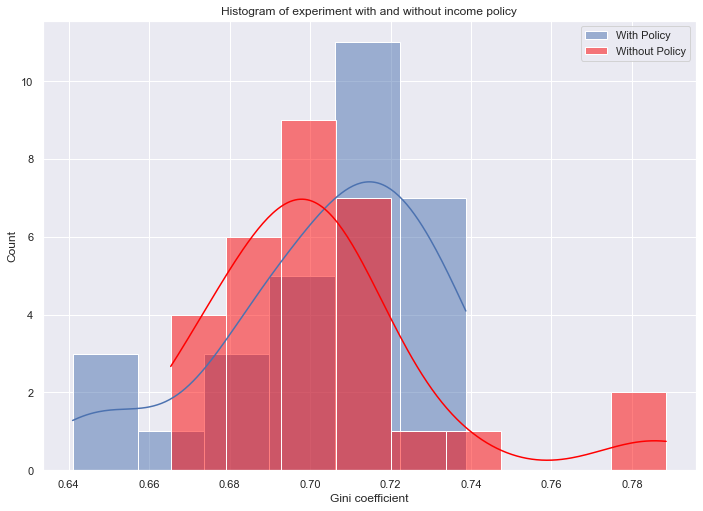

In [4]:
'''
Plots
'''
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(with_income_policy, kde = True, label = 'With Policy')
sns.histplot(without_income_policy, kde = True, color='red', label = 'Without Policy')
plt.xlabel('Gini coefficient')
plt.legend()
plt.title('Histogram of experiment with and without income policy')
plt.show()

In [6]:
'''
T-test
'''
ttest = scipy.stats.ttest_ind(without_income_policy, with_income_policy)

print(f'With policy: Mean = {np.mean(with_income_policy)}, SD = {np.std(with_income_policy)}')
print(f'No policy: Mean = {np.mean(without_income_policy)}, SD = {np.std(without_income_policy)}')
print(f'T = {ttest[0]}, p = {ttest[1]}')

With policy: Mean = 0.7042516695561268, SD = 0.025638784092229656
No policy: Mean = 0.7025341102816454, SD = 0.027410014747049943
T = -0.24643831672836986, p = 0.8062130674637721


### Experiment: 20 year old policy

In [6]:
with_age_policy = []
without_age_policy = []
n = 30

for i in range(n):

    model_s = HousingMarket(s_policy = True)
    model_s.run_model(1000)
    data = model_s.datacollector.get_model_vars_dataframe()
    with_age_policy.append(data['Gini'].iloc[-1])
    
for i in range(n):

    model = HousingMarket()
    model.run_model(1000)
    data = model.datacollector.get_model_vars_dataframe()
    without_age_policy.append(data['Gini'].iloc[-1])

In [7]:
print(with_age_policy)
print(without_age_policy)

[0.6099728052135313, 0.6221329190229665, 0.5798995427201168, 0.6054328894398321, 0.6444744789608086, 0.5801723196202889, 0.6422764442509722, 0.5896043763652, 0.6705052509867743, 0.5841638084209637, 0.5960234558048229, 0.5446980828918447, 0.5875124949539028, 0.5481111354185036, 0.6112097949963093, 0.5714558367755552, 0.592425901745434, 0.6470256589947068, 0.6397094790625145, 0.630100210638366, 0.6431640075939886, 0.5787026045709176, 0.6077050033031873, 0.5983467203631115, 0.6670881730443932, 0.5974754649570247, 0.5794290312784394, 0.6432318762618988, 0.6211554743100167, 0.6158323901807208]
[0.7334598502793478, 0.6981283464858014, 0.7537670315804293, 0.812118322556342, 0.7117381209360496, 0.7126109924339843, 0.6999541686728311, 0.6836233683216707, 0.6704202411821731, 0.6784135915416293, 0.7128421266334389, 0.7614969519319539, 0.725372921098148, 0.6812140807189251, 0.7213019220861041, 0.7115054403032013, 0.6614982582384968, 0.7245875936842969, 0.6474327599656842, 0.7037780448145198, 0.726

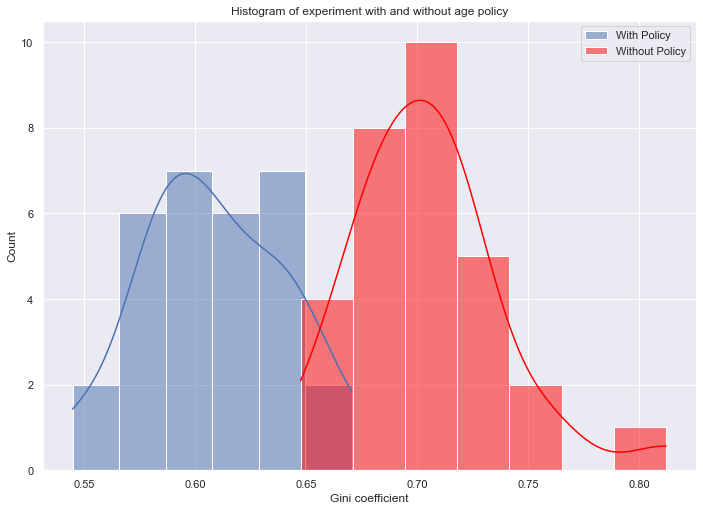

In [12]:
'''
Plots
'''
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(with_age_policy, kde = True, label = 'With Policy')
sns.histplot(without_age_policy, kde = True, color='red', label = 'Without Policy')
plt.legend()
plt.xlabel('Gini coefficient')
plt.title('Histogram of experiment with and without age policy')
plt.show()

In [9]:
'''
T-test
'''
ttest = scipy.stats.ttest_ind(without_age_policy, with_age_policy)

print(f'No policy: Mean = {np.mean(with_age_policy)}, SD = {np.std(with_age_policy)}')
print(f'No policy: Mean = {np.mean(without_age_policy)}, SD = {np.std(without_age_policy)}')
print(f'T = {ttest[0]}, p = {ttest[1]}')

No policy: Mean = 0.6083012544049038, SD = 0.031588377453028324
No policy: Mean = 0.704582518842506, SD = 0.03264845254731855
T = 11.413334665599661, p = 1.8463117216718677e-16
